In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [14]:
df = pd.read_csv('DataSet3_2.csv', sep = ';')
df['Dollar'] = df['Dollar'].str.replace(',', '.').astype(float)
df['Oil Brent'] = df['Oil Brent'].str.replace(',', '.').astype(float)
df['Dollar'] = df['Dollar'].astype(int)
df['Oil Brent'] = df['Oil Brent'].astype(int)

df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
start_date = pd.to_datetime('01.01.2020', format='%d.%m.%Y')
df['Data'] = (df['Data'] - start_date).dt.days
df.head()

,Data,Dollar,Oil Brent
0,0,61,66
1,8,61,65
2,9,61,65
3,10,61,64
4,13,60,64


In [15]:
# Подготовка данных с учетом лагов
lags = 1  # количество лагов
df['Oil Brent Lag'] = df['Oil Brent'].shift(lags)
data = df.dropna()
data.head()

,Data,Dollar,Oil Brent,Oil Brent Lag
1,8,61,65,66.0
2,9,61,65,65.0
3,10,61,64,65.0
4,13,60,64,64.0
5,14,61,64,64.0


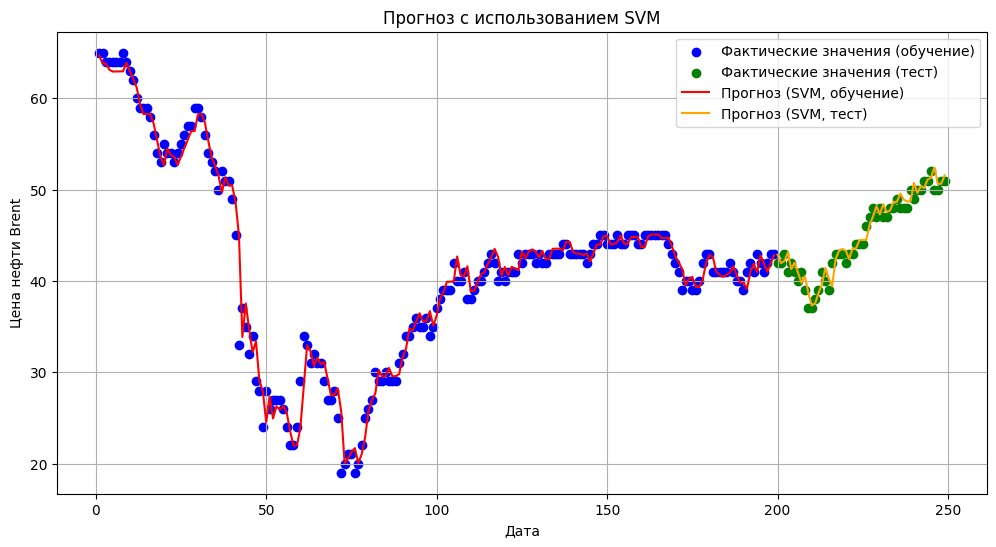

RMSE (SVM, обучение): 1.6859782751081234
RMSE (SVM, тест): 1.0688349898245915


In [16]:
# Разделение данных на обучающий и тестовый наборы
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_train = train_data['Oil Brent']
X_test = test_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_test = test_data['Oil Brent']

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели SVM
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Прогноз на обучающаюх и тестовом наборах
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Вычисление RMSE
rmse_train_svm = np.sqrt(mean_squared_error(y_train, y_train_pred_svm))
rmse_test_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_svm, label='Прогноз (SVM, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_svm, label='Прогноз (SVM, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием SVM')
plt.legend()
plt.grid(True)
plt.show()

# Вывод RMSE
print(f'RMSE (SVM, обучение): {rmse_train_svm}')
print(f'RMSE (SVM, тест): {rmse_test_svm}')


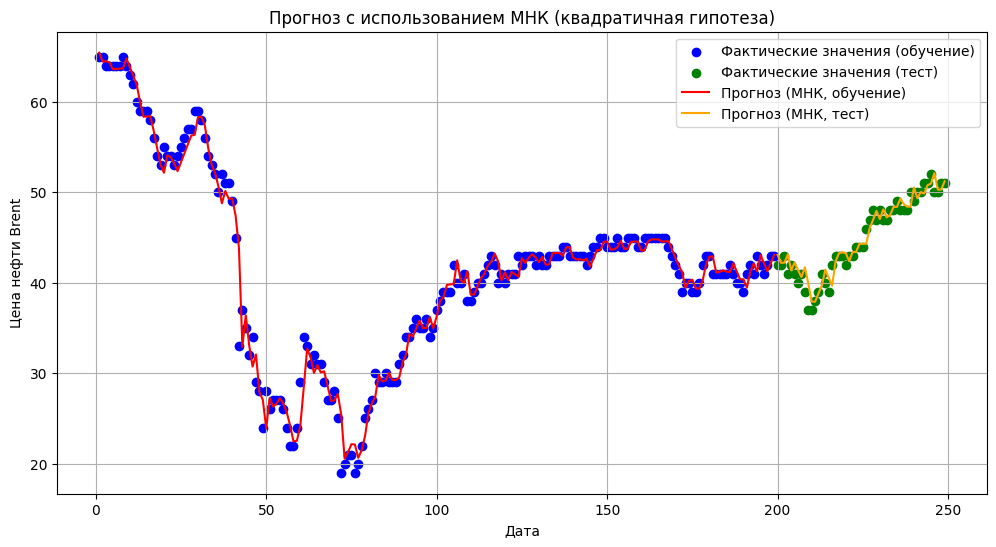

RMSE (МНК, обучение): 1.6007227073329104
RMSE (МНК, тест): 1.1520389510018176


In [17]:
# Обучение модели МНК с квадратичной гипотезой
poly_features = PolynomialFeatures(degree=2)  # Используем полином 2-й степени
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# Прогноз на обучающих и тестовых наборах
y_train_pred_mnk = lm.predict(X_train_poly)
y_test_pred_mnk = lm.predict(X_test_poly)

# Вычисление RMSE для МНК
rmse_train_mnk = np.sqrt(mean_squared_error(y_train, y_train_pred_mnk))
rmse_test_mnk = np.sqrt(mean_squared_error(y_test, y_test_pred_mnk))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_mnk, label='Прогноз (МНК, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_mnk, label='Прогноз (МНК, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием МНК (квадратичная гипотеза)')
plt.legend()
plt.grid(True)
plt.show()

# Вывод RMSE
print(f'RMSE (МНК, обучение): {rmse_train_mnk}')
print(f'RMSE (МНК, тест): {rmse_test_mnk}')



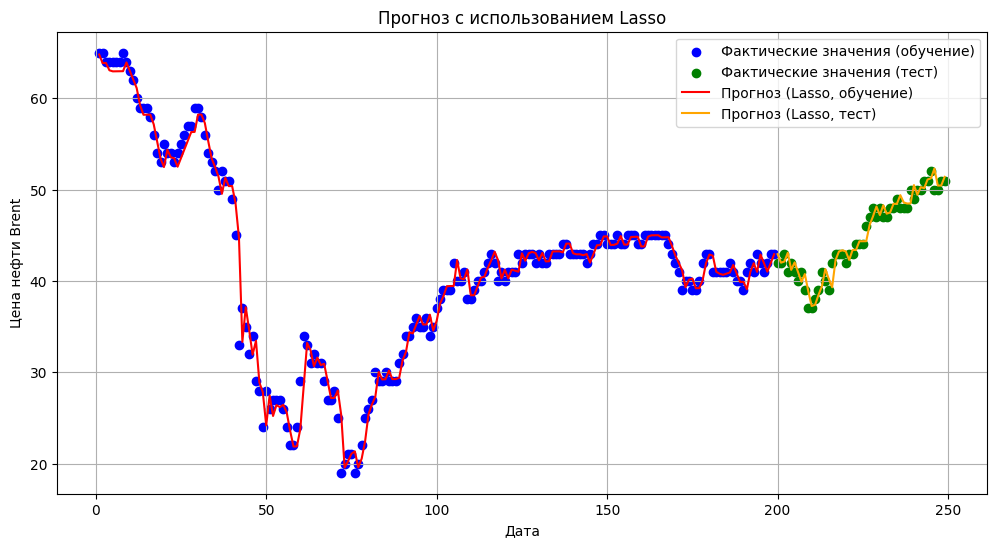

RMSE (Lasso, обучение): 1.669497805307686
RMSE (Lasso, тест): 1.0701023958102096


In [18]:
# Разделение данных на обучающий и тестовый наборы (данные уже подготовлены с лагами)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_train = train_data['Oil Brent']
X_test = test_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_test = test_data['Oil Brent']

# Обучение модели Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Прогноз на обучающем и тестовом наборах
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Вычисление RMSE
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_lasso, label='Прогноз (Lasso, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_lasso, label='Прогноз (Lasso, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием Lasso')
plt.legend()
plt.grid(True)
plt.show()

print(f'RMSE (Lasso, обучение): {rmse_train_lasso}')
print(f'RMSE (Lasso, тест): {rmse_test_lasso}')


RMSE (PLS, обучение): 2.026705581680227
RMSE (PLS, тест): 1.4822582050306417


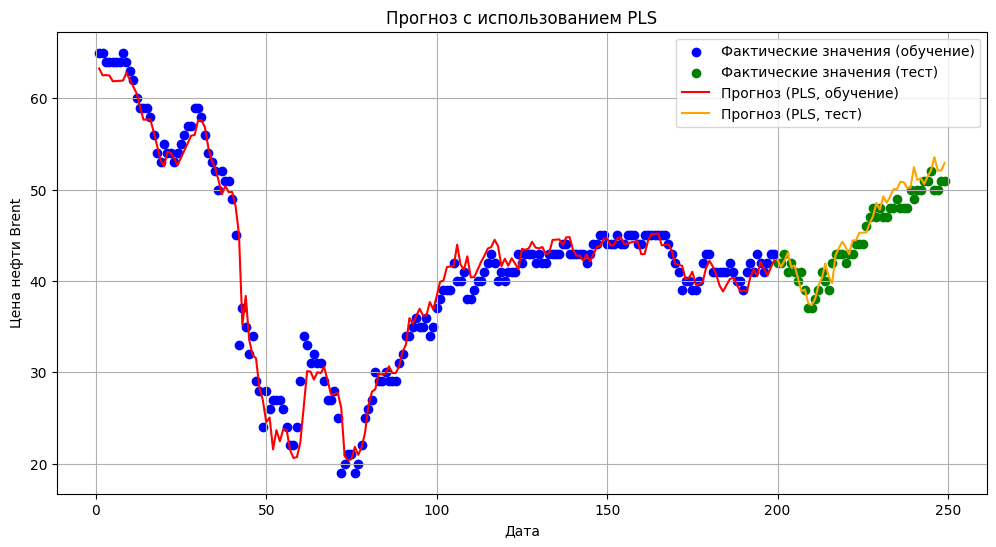

In [19]:
# Разделение данных на обучающий и тестовый наборы (данные уже подготовлены с лагами)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_train = train_data['Oil Brent']
X_test = test_data[['Data', 'Oil Brent Lag', 'Dollar']]
y_test = test_data['Oil Brent']

# Обучение модели PLS
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)

# Прогноз на обучающем и тестовом наборах
y_train_pred_pls = pls_model.predict(X_train)
y_test_pred_pls = pls_model.predict(X_test)

# Вычисление RMSE
rmse_train_pls = np.sqrt(mean_squared_error(y_train, y_train_pred_pls))
rmse_test_pls = np.sqrt(mean_squared_error(y_test, y_test_pred_pls))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_pls, label='Прогноз (PLS, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_pls, label='Прогноз (PLS, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием PLS')
plt.legend()
plt.grid(True)
# plt.show()

# Вывод RMSE
print(f'RMSE (PLS, обучение): {rmse_train_pls}')
print(f'RMSE (PLS, тест): {rmse_test_pls}')



Laba 7

In [23]:
import plotly.graph_objects as go
import pandas as pd

data = pd.DataFrame({'Фактические значения': y_test, 'SVM': y_test_pred_svm, 'МНК': y_test_pred_mnk, 'Lasso': y_test_pred_lasso})

# Создание боксплотов
fig = go.Figure()

# Добавление боксплотов для каждой модели
for column in data.columns:
    fig.add_trace(go.Box(y=data[column], name=column))

# Настройка внешнего вида боксплота
fig.update_layout(
    title="Боксплот для сравнения моделей",
    xaxis_title="Модели",
    yaxis_title="Значения"
)

# Отображение боксплота
fig.show()


In [21]:
import numpy as np
from scipy.stats import chisquare, f, ttest_ind

# Шаг 1: Вычисление остатков моделей
residuals_svm = y_test - y_test_pred_svm
residuals_mnk = y_test - y_test_pred_mnk
residuals_lasso = y_test - y_test_pred_lasso

# Шаг 2: Проверка нормальности остатков с помощью критерия Хи-квадрат
_, p_value_svm = chisquare(residuals_svm)
_, p_value_mnk = chisquare(residuals_mnk)
_, p_value_lasso = chisquare(residuals_lasso)

# Шаг 3: Сравнение моделей с использованием критерия Фишера (F-тест)
# Вычисление SSE для каждой модели
sse_svm = np.sum(residuals_svm**2)
sse_mnk = np.sum(residuals_mnk**2)
sse_lasso = np.sum(residuals_lasso**2)

# Сравнение моделей с использованием F-теста
f_statistic = ((sse_mnk - sse_svm) / (3 - 2)) / (sse_svm / (len(y_test) - 3))
p_value_fisher = 1 - f.cdf(f_statistic, 1, len(y_test) - 3)

# Шаг 4: Сравнение остатков моделей с использованием t-теста
t_statistic, p_value_t_svm_mnk = ttest_ind(residuals_svm, residuals_mnk, equal_var=False)
t_statistic, p_value_t_svm_lasso = ttest_ind(residuals_svm, residuals_lasso, equal_var=False)
t_statistic, p_value_mnk_lasso = ttest_ind(residuals_mnk, residuals_lasso, equal_var=False)

# Вывод результатов
print(f'p-value (Хи-квадрат) SVM: {p_value_svm}')
print(f'p-value (Хи-квадрат) МНК: {p_value_mnk}')
print(f'p-value (Хи-квадрат) Lasso: {p_value_lasso}')
print(f'p-value (F-тест): {p_value_fisher}')
print(f'p-value (t-тест SVM vs МНК): {p_value_t_svm_mnk}')
print(f'p-value (t-тест SVM vs Lasso): {p_value_t_svm_lasso}')
print(f'p-value (t-тест МНК vs Lasso): {p_value_mnk_lasso}')


p-value (Хи-квадрат) SVM: 1.0
p-value (Хи-квадрат) МНК: 1.0
p-value (Хи-квадрат) Lasso: 1.0
p-value (F-тест): 0.008274858542270058
p-value (t-тест SVM vs МНК): 0.9237999567827127
p-value (t-тест SVM vs Lasso): 0.6521679842760331
p-value (t-тест МНК vs Lasso): 0.7356989466766732


p-value (Хи-квадрат) SVM, МНК, Lasso: 1.0 - это результаты теста хи-квадрат, который используется для проверки статистической независимости между двумя категориальными переменными. Значение 1.0 указывает на отсутствие статистической зависимости между переменными.

p-value (F-тест): 0.008274858542270058 - это результаты F-теста, который используется для сравнения дисперсий между двумя или более наборами данных. Значение 0.0082 означает, что различие в дисперсиях между группами статистически значимо.

p-value (t-тест SVM vs МНК): 0.9237999567827127 - это результаты t-теста, который используется для сравнения средних значений двух групп. Значение 0.9237 означает, что нет статистически значимой разницы между средними значениями в группах SVM и МНК.





